In [2]:
import numpy as np
from scipy.stats import norm

def bsm_greeks(S, K, T, r, sigma, option_type='Call',greek="Delta"):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'Call':
        # premium = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
        if greek == "Delta":
            return norm.cdf(d1)
        elif greek == "Gamma":
            return norm.pdf(d1) / (S * sigma * np.sqrt(T))
        elif greek == "Theta":
            return -(S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)
        elif greek == "Vega":
            return S * np.sqrt(T) * norm.pdf(d1)
        elif greek == "Rho":
            return K * T * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'Put':
        # premium = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
        if greek == "Delta":
            return -norm.cdf(-d1)
        elif greek == "Gamma":
            return norm.pdf(d1) / (S * sigma * np.sqrt(T))
        elif greek == "Theta":
            return -(S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * norm.cdf(-d2)
        elif greek == "Vega":
            return S * np.sqrt(T) * norm.pdf(d1)
        elif greek == "Rho":
            return -K * T * np.exp(-r * T) * norm.cdf(-d2)
    else:
        raise ValueError("Invalid option type. Please choose 'Call' or 'Put'.")
    
def bsm_premium(S, K, T, r, sigma, option_type='Call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'Call':
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
   



In [3]:
import matplotlib.pyplot as plt

BULL_CALL SPREAD

-6.054029661003682


C:\Users\aryan.goyal\AppData\Local\Temp\ipykernel_34020\2249360065.py:36: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))


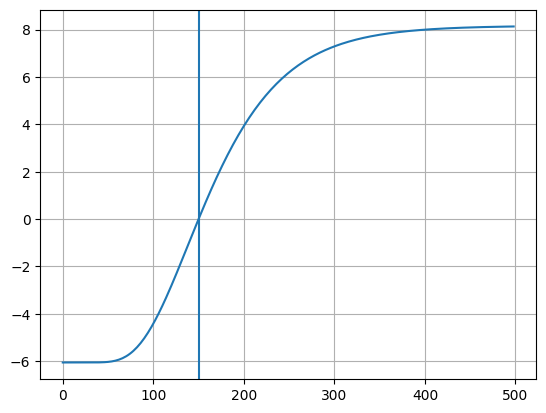

In [35]:
S = [i for i in range(0,500,2)]
K = [150,165]
sigma = 0.4
T = 1
rfr = 0.0533

Premium_1 = [bsm_premium(i,K[0],T,rfr,sigma,"Call") for i in S]
Premium_2 = [bsm_premium(i,K[1],T,rfr,sigma,"Call") for i in S]
#ATM CALL BUY
paid_1 = -bsm_premium(150,K[0],T,rfr,sigma,"Call")
payoff_1 = [paid_1+i for i in Premium_1]
# print(payoff_1)
#OTM CALL SELL
rec_2 = bsm_premium(150,K[1],T,rfr,sigma,"Call")
initial_pnl = paid_1 + rec_2
print(initial_pnl)
payoff_2 = [rec_2-i for i in Premium_2]
# print(payoff_2)
net = [payoff_1[i] + payoff_2[i] for i in range(len(payoff_1))]
plt.plot(S,net)
plt.axvline(x=150,)
# plt.plot(S,payoff_2)
plt.grid(True)

BEAR_CALL SPREAD

6.054029661003682


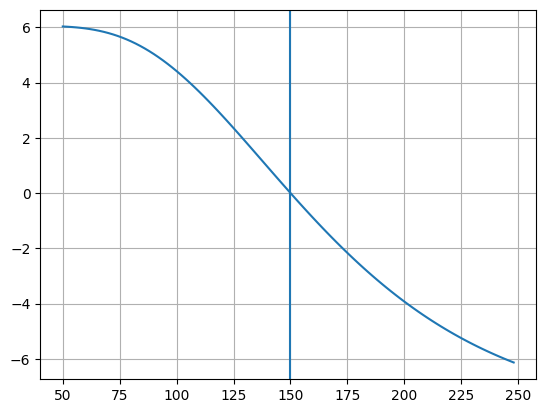

In [5]:
S = [i for i in range(50,250,2)]
K = [150,165]
sigma = 0.4
T = 1
rfr = 0.0533

Premium_1 = [bsm_premium(i,K[0],T,rfr,sigma,"Call") for i in S]
Premium_2 = [bsm_premium(i,K[1],T,rfr,sigma,"Call") for i in S]
#ATM CALL SELL
paid_1 = bsm_premium(150,K[0],T,rfr,sigma,"Call")
payoff_1 = [paid_1-i for i in Premium_1]
# print(payoff_1)
#OTM CALL BUY
rec_2 = -bsm_premium(150,K[1],T,rfr,sigma,"Call")
initial_pnl = paid_1 + rec_2
print(initial_pnl)
payoff_2 = [rec_2+i for i in Premium_2]
# print(payoff_2)
net = [payoff_1[i] + payoff_2[i] for i in range(len(payoff_1))]
plt.plot(S,net)
plt.axvline(x=150,)
# plt.plot(S,payoff_2)
plt.grid(True)

BULL_PUT SPREAD

6.756605050886975


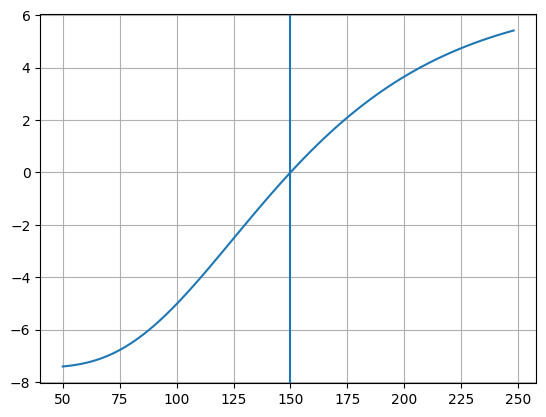

In [6]:
S = [i for i in range(50,250,2)]
K = [150,135]
sigma = 0.4
T = 1
rfr = 0.0533

Premium_1 = [bsm_premium(i,K[0],T,rfr,sigma,"Put") for i in S]
Premium_2 = [bsm_premium(i,K[1],T,rfr,sigma,"Put") for i in S]
#ATM PUT SELL
paid_1 = bsm_premium(150,K[0],T,rfr,sigma,"Put")
payoff_1 = [paid_1-i for i in Premium_1]
# print(payoff_1)
#OTM PUT bUY
rec_2 = -bsm_premium(150,K[1],T,rfr,sigma,"Put")
initial_pnl = paid_1 + rec_2
print(initial_pnl)
payoff_2 = [rec_2+i for i in Premium_2]
# print(payoff_2)
net = [payoff_1[i] + payoff_2[i] for i in range(len(payoff_1))]
plt.plot(S,net)
plt.axvline(x=150,)
# plt.plot(S,payoff_2)
plt.grid(True)

BEAR_PUT SPREAD

-6.756605050886975


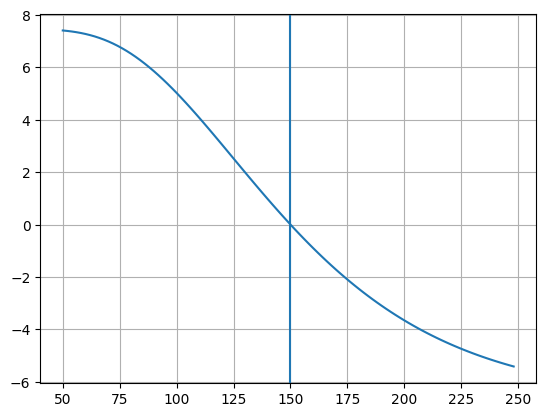

In [7]:
S = [i for i in range(50,250,2)]
K = [150,135]
sigma = 0.4
T = 1
rfr = 0.0533

Premium_1 = [bsm_premium(i,K[0],T,rfr,sigma,"Put") for i in S]
Premium_2 = [bsm_premium(i,K[1],T,rfr,sigma,"Put") for i in S]
#ATM CALL BUY
paid_1 = -bsm_premium(150,K[0],T,rfr,sigma,"Put")
payoff_1 = [paid_1+i for i in Premium_1]
# print(payoff_1)
#OTM CALL SELL
rec_2 = bsm_premium(150,K[1],T,rfr,sigma,"Put")
initial_pnl = paid_1 + rec_2
print(initial_pnl)
payoff_2 = [rec_2-i for i in Premium_2]
# print(payoff_2)
net = [payoff_1[i] + payoff_2[i] for i in range(len(payoff_1))]
plt.plot(S,net)
plt.axvline(x=150,)
# plt.plot(S,payoff_2)
plt.grid(True)

BULL-CALL FLY

60.837785020686795
-42.297723572356105
-21.73569495392411


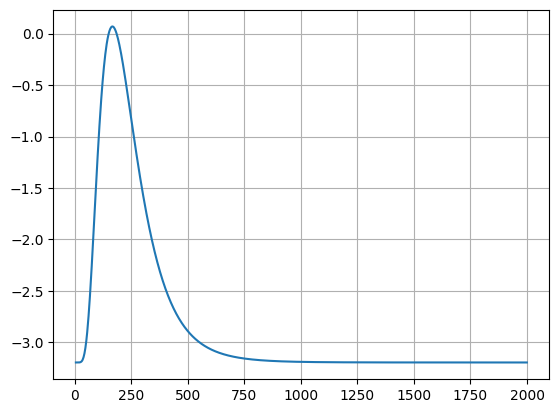

In [8]:
S = [i for i in range(5,2000,2)]
K = [125,150,175]
sigma = 1
T = 0.25
rfr = 0.0533
#CALL PREMIUM for itm,atm,otm
itm = [bsm_premium(i,K[0],T,rfr,sigma,"Call") for i in S]
atm = [bsm_premium(i,K[1],T,rfr,sigma,"Call") for i in S]
otm = [bsm_premium(i,K[2],T,rfr,sigma,"Call") for i in S]

#ATM CALL SELL
rec = bsm_premium(150,K[1],T,rfr,sigma,"Call")*2
print(rec)
atm_payoff = [rec-i*2 for i in atm]
# print(atm_payoff)
#ITM call buy
pay_1 = -bsm_premium(150,K[0],T,rfr,sigma,"Call")
print(pay_1)
itm_payoff = [pay_1+i for i in itm]
# print(itm_payoff)
#OTM CALL BUY
pay_2 = -bsm_premium(150,K[2],T,rfr,sigma,"Call")
print(pay_2)
otm_payoff = [pay_2+i for i in otm]
# print(otm_payoff)
net = [atm_payoff[i]+itm_payoff[i]+otm_payoff[i] for i in range(len(atm_payoff))]
# for i in range(len(net)):
#     if net[i]>0:
#         print(S[i],net[i])
plt.plot(S,net)
plt.grid(True)

BULL-CALL SPREAD CONSTANT SPOT AND INCREASING VOL

-5.8092497586159055


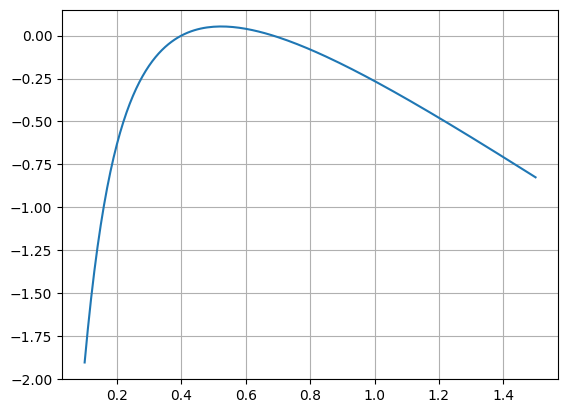

In [9]:
S = 150
K = [150,165]
vol = 0.4
sigma = [i/100 for i in range(10,151)]
T = 0.25
rfr = 0.0533

Premium_1 = [bsm_premium(S,K[0],T,rfr,i,"Call") for i in sigma]
Premium_2 = [bsm_premium(S,K[1],T,rfr,i,"Call") for i in sigma]
#ATM CALL BUY
paid_1 = -bsm_premium(150,K[0],T,rfr,vol,"Call")
payoff_1 = [paid_1+i for i in Premium_1]
# print(payoff_1)
#OTM CALL SELL
rec_2 = bsm_premium(150,K[1],T,rfr,vol,"Call")
initial_pnl = paid_1 + rec_2
print(initial_pnl)
payoff_2 = [rec_2-i for i in Premium_2]
# print(payoff_2)
net = [payoff_1[i] + payoff_2[i] for i in range(len(payoff_1))]
plt.plot(sigma,net)
# plt.axvline(x=150,)
# plt.plot(S,payoff_2)
plt.grid(True)

BEAR-CALL SPREAD MOVING VOL

5.8092497586159055


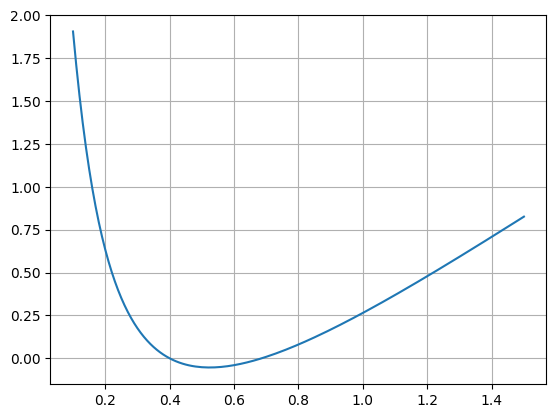

In [10]:
S = 150
K = [150,165]
sigma = [i/100 for i in range(10,151)]
T = 0.25
rfr = 0.0533
vol =0.4
Premium_1 = [bsm_premium(S,K[0],T,rfr,i,"Call") for i in sigma]
Premium_2 = [bsm_premium(S,K[1],T,rfr,i,"Call") for i in sigma]
#ATM CALL SELL
paid_1 = bsm_premium(150,K[0],T,rfr,vol,"Call")
payoff_1 = [paid_1-i for i in Premium_1]
# print(payoff_1)
#OTM CALL BUY
rec_2 = -bsm_premium(150,K[1],T,rfr,vol,"Call")
initial_pnl = paid_1 + rec_2
print(initial_pnl)
payoff_2 = [rec_2+i for i in Premium_2]
# print(payoff_2)
net = [payoff_1[i] + payoff_2[i] for i in range(len(payoff_1))]
plt.plot(sigma,net)
# plt.axvline(x=150,)
# plt.plot(S,payoff_2)
plt.grid(True)

Bull_Call Moving Time

-5.8092497586159055


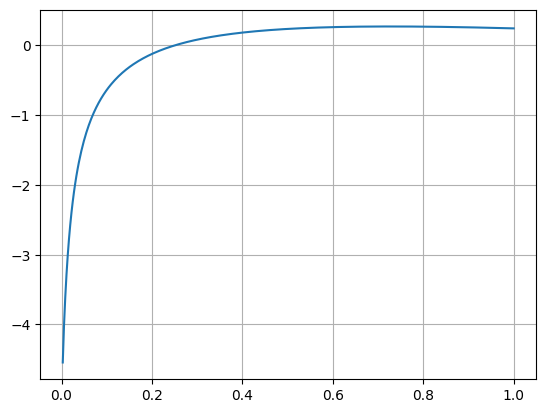

In [11]:
S = 150
K = [150,165]
vol = 0.4
sigma = 0.4
T = [i/365 for i in range(365,0,-1)]
t = 0.25
rfr = 0.0533

Premium_1 = [bsm_premium(S,K[0],i,rfr,sigma,"Call") for i in T]
Premium_2 = [bsm_premium(S,K[1],i,rfr,sigma,"Call") for i in T]
#ATM CALL BUY
paid_1 = -bsm_premium(150,K[0],t,rfr,vol,"Call")
payoff_1 = [paid_1+i for i in Premium_1]
# print(payoff_1)
#OTM CALL SELL
rec_2 = bsm_premium(150,K[1],t,rfr,vol,"Call")
initial_pnl = paid_1 + rec_2
print(initial_pnl)
payoff_2 = [rec_2-i for i in Premium_2]
# print(payoff_2)
net = [payoff_1[i] + payoff_2[i] for i in range(len(payoff_1))]
plt.plot(T,net)
# plt.axvline(x=150,)
# plt.plot(S,payoff_2)
plt.grid(True)

# BULL-CALL SPREAD MOVING SPOT DIFFERENT SPREADS

Strikes :  [[125, 127], [130, 132], [135, 137], [140, 142], [145, 147], [150, 152], [155, 157], [160, 162]]
initial :  -0.9152378299992137
initial :  -0.8095423996293292
initial :  -0.7106603831701861
initial :  -0.6195086824255043
initial :  -0.5365784664956266
initial :  -0.4620048906686094
initial :  -0.39564159838655044
initial :  -0.3371326105265382


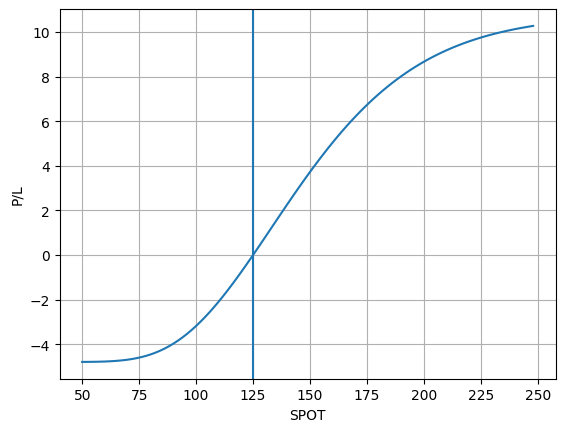

In [12]:
S = [i for i in range(50,250,2)]
T = 0.5
rfr = 0.0533
sigma = 0.4
K = [[i,i+2] for i in range(125,165,5)]
print("Strikes : ",K)
#call function for each strike and returning net payoff for each spread
def call_spread(atm,S,K,T,sigma,rfr):
    #Buy First Strike(lower) | Sell Second Strike(higher)
    pay = -bsm_premium(atm,K[0],T,rfr,sigma,"Call")
    recv = bsm_premium(atm,K[1],T,rfr,sigma,"Call")
    print("initial : ",pay+recv)
    payoff_1 = [pay+bsm_premium(i,K[0],T,rfr,sigma,"Call") for i in S]
    payoff_2 = [recv-bsm_premium(i,K[1],T,rfr,sigma,"Call") for i in S]
    net = [payoff_1[i]+payoff_2[i] for i in range(len(payoff_1))]
    return net
atm = 125
res = []
for i in K:
    a = call_spread(atm,S,i,T,sigma,rfr)
    for j in range(len(a)):
        try:
            res[j]+=a[j]
        except:
            res.append(a[j])
plt.plot(S,res)
plt.xlabel("SPOT")
plt.ylabel("P/L")
plt.axvline(x=atm)
plt.grid(True)

# BULL-CALL SPREAD MOVING VOLATILITY DIFFERERNT SPREADS
- Here P/L is just the net debit of each spread as spot is not moving

Strikes :  [[125, 127], [130, 132], [135, 137], [140, 142], [145, 147], [150, 152], [155, 157], [160, 162]]
initial :  -0.9152378299992137
initial :  -0.8095423996293292
initial :  -0.7106603831701861
initial :  -0.6195086824255043
initial :  -0.5365784664956266
initial :  -0.4620048906686094
initial :  -0.39564159838655044
initial :  -0.3371326105265382


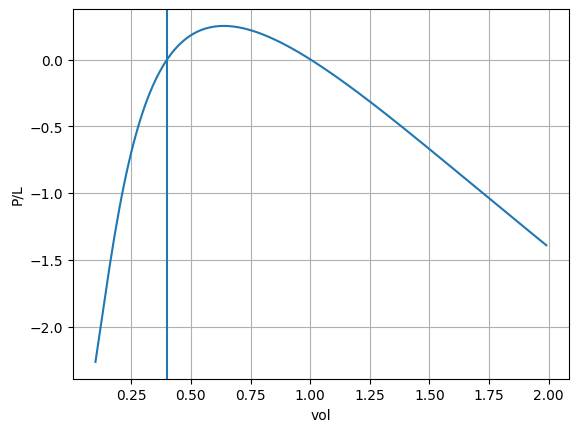

In [13]:
S = 125
T = 0.5
rfr = 0.0533
VOL = 0.4
sigma = [i/100 for i in range(10,200)]
K = [[i,i+2] for i in range(125,165,5)]
print("Strikes : ",K)
#call function for each strike and returning net payoff for each spread
def call_spread(VOL,S,K,T,sigma,rfr):
    #Buy First Strike(lower) | Sell Second Strike(higher)
    pay = -bsm_premium(S,K[0],T,rfr,VOL,"Call")
    recv = bsm_premium(S,K[1],T,rfr,VOL,"Call")
    print("initial : ",pay+recv)
    payoff_1 = [pay+bsm_premium(S,K[0],T,rfr,i,"Call") for i in sigma]
    payoff_2 = [recv-bsm_premium(S,K[1],T,rfr,i,"Call") for i in sigma]
    net = [payoff_1[i]+payoff_2[i] for i in range(len(payoff_1))]
    return net
atm = 125
res = []
for i in K:
    a = call_spread(VOL,S,i,T,sigma,rfr)
    for j in range(len(a)):
        try:
            res[j]+=a[j]
        except:
            res.append(a[j])
plt.plot(sigma,res)
plt.xlabel("vol")
plt.ylabel("P/L")
plt.axvline(x= VOL)
plt.grid(True)

# BULL-CALL SPREAD MOVING TIME DIFFERENT SPREADS

Strikes :  [[125, 127], [130, 132], [135, 137], [140, 142], [145, 147], [150, 152], [155, 157], [160, 162]]
initial :  -0.9152378299992137
initial :  -0.8095423996293292
initial :  -0.7106603831701861
initial :  -0.6195086824255043
initial :  -0.5365784664956266
initial :  -0.4620048906686094
initial :  -0.39564159838655044
initial :  -0.3371326105265382


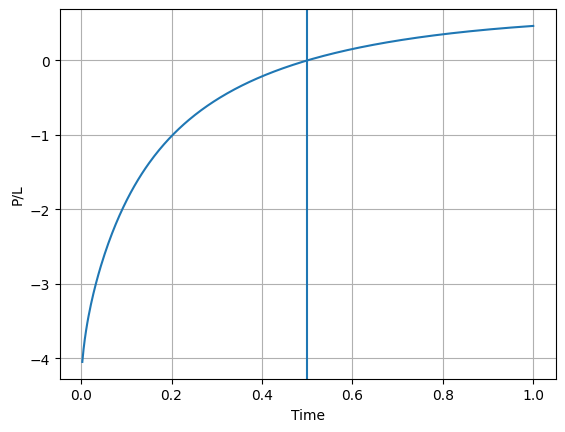

In [14]:
S = 125
T = 0.5
rfr = 0.0533
sigma = 0.4
tte = [i/365 for i in range(365,0,-1)]
K = [[i,i+2] for i in range(125,165,5)]
print("Strikes : ",K)
#call function for each strike and returning net payoff for each spread
def call_spread(tte,S,K,T,sigma,rfr):
    #Buy First Strike(lower) | Sell Second Strike(higher)
    pay = -bsm_premium(S,K[0],T,rfr,sigma,"Call")
    recv = bsm_premium(S,K[1],T,rfr,sigma,"Call")
    print("initial : ",pay+recv)
    payoff_1 = [pay+bsm_premium(S,K[0],i,rfr,sigma,"Call") for i in tte]
    payoff_2 = [recv-bsm_premium(S,K[1],i,rfr,sigma,"Call") for i in tte]
    net = [payoff_1[i]+payoff_2[i] for i in range(len(payoff_1))]
    return net
atm = 125
res = []
for i in K:
    a = call_spread(tte,S,i,T,sigma,rfr)
    for j in range(len(a)):
        try:
            res[j]+=a[j]
        except:
            res.append(a[j])
plt.plot(tte,res)
plt.xlabel("Time")
plt.ylabel("P/L")
plt.axvline(x= T)
plt.grid(True)

- As we are approaching maturity, premium for lower strike would increase and for the higher strike it will increase, making our net debit higher

# BULL-CALL SPREAD MOVING SPOT AND VOL DIFFERENT SPREADS

Strikes :  [[125, 127], [130, 132], [135, 137], [140, 142], [145, 147], [150, 152], [155, 157], [160, 162]]
initial :  -0.9152378299992137
initial :  -0.8095423996293292
initial :  -0.7106603831701861
initial :  -0.6195086824255043
initial :  -0.5365784664956266
initial :  -0.4620048906686094
initial :  -0.39564159838655044
initial :  -0.3371326105265382


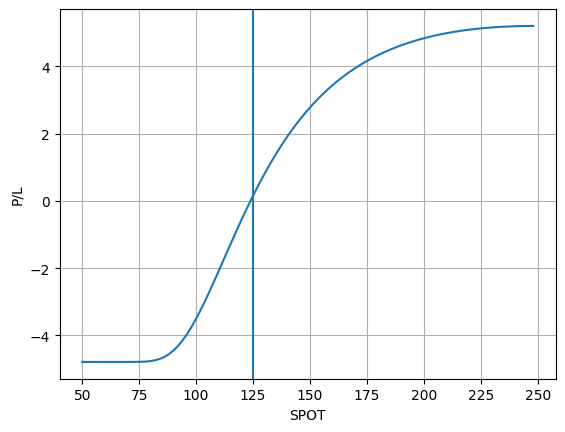

In [18]:
S = [i for i in range(50,250,2)]
T = 0.5
rfr = 0.0533
sigma = [i/100 for i in range(10,110)]
K = [[i,i+2] for i in range(125,165,5)]
print("Strikes : ",K)
#call function for each strike and returning net payoff for each spread
def call_spread(atm,vol,S,K,T,sigma,rfr):
    #Buy First Strike(lower) | Sell Second Strike(higher)
    pay = -bsm_premium(atm,K[0],T,rfr,vol,"Call")
    recv = bsm_premium(atm,K[1],T,rfr,vol,"Call")
    print("initial : ",pay+recv)
    payoff_1 = [pay+bsm_premium(S[i],K[0],T,rfr,sigma[i],"Call") for i in range(len(S))]
    payoff_2 = [recv-bsm_premium(S[i],K[1],T,rfr,sigma[i],"Call") for i in range(len(S))]
    net = [payoff_1[i]+payoff_2[i] for i in range(len(payoff_1))]
    return net
atm = 125
vol = 0.4
res = []
for i in K:
    a = call_spread(atm,vol,S,i,T,sigma,rfr)
    for j in range(len(a)):
        try:
            res[j]+=a[j]
        except:
            res.append(a[j])
plt.plot(S,res)
plt.xlabel("SPOT")
plt.ylabel("P/L")
plt.axvline(x=atm)
plt.grid(True)

Strikes :  [[125, 127], [130, 132], [135, 137], [140, 142], [145, 147], [150, 152], [155, 157], [160, 162]]
initial :  -0.9152378299992137
initial :  -0.8095423996293292
initial :  -0.7106603831701861
initial :  -0.6195086824255043
initial :  -0.5365784664956266
initial :  -0.4620048906686094
initial :  -0.39564159838655044
initial :  -0.3371326105265382


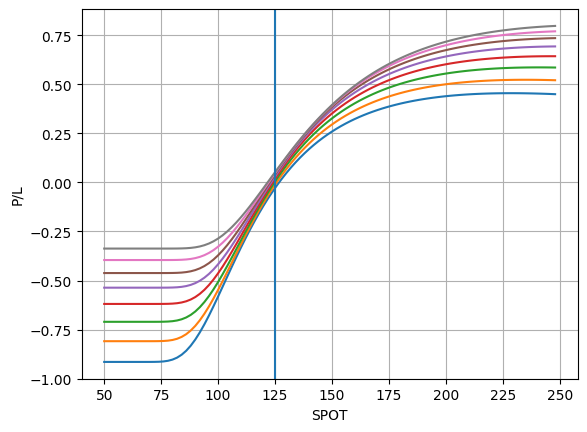

In [27]:
S = [i for i in range(50,250,2)]
T = 0.5
rfr = 0.0533
sigma = [i/100 for i in range(10,110)]
# sigma= sigma[::-1]
K = [[i,i+2] for i in range(125,165,5)]
print("Strikes : ",K)
#call function for each strike and returning net payoff for each spread
def call_spread(atm,vol,S,K,T,sigma,rfr):
    #Buy First Strike(lower) | Sell Second Strike(higher)
    pay = -bsm_premium(atm,K[0],T,rfr,vol,"Call")
    recv = bsm_premium(atm,K[1],T,rfr,vol,"Call")
    print("initial : ",pay+recv)
    payoff_1 = [pay+bsm_premium(S[i],K[0],T,rfr,sigma[i],"Call") for i in range(len(S))]
    payoff_2 = [recv-bsm_premium(S[i],K[1],T,rfr,sigma[i],"Call") for i in range(len(S))]
    net = [payoff_1[i]+payoff_2[i] for i in range(len(payoff_1))]
    return net
atm = 125
vol = 0.4
res = []
for i in K:
    a = call_spread(atm,vol,S,i,T,sigma,rfr)
    plt.plot(S,a)
    # plt.legend(i)
    for j in range(len(a)):
        try:
            res[j]+=a[j]
        except:
            res.append(a[j])
# plt.plot(S,res)
plt.xlabel("SPOT")
plt.ylabel("P/L")
plt.axvline(x=atm)
plt.grid(True)

# BULL-CALL SPREAD MOVING SPOT AND TTE

Strikes :  [[125, 127], [130, 132], [135, 137], [140, 142], [145, 147], [150, 152], [155, 157], [160, 162]]
initial :  -0.9152378299992137
initial :  -0.8095423996293292
initial :  -0.7106603831701861
initial :  -0.6195086824255043
initial :  -0.5365784664956266
initial :  -0.4620048906686094
initial :  -0.39564159838655044
initial :  -0.3371326105265382


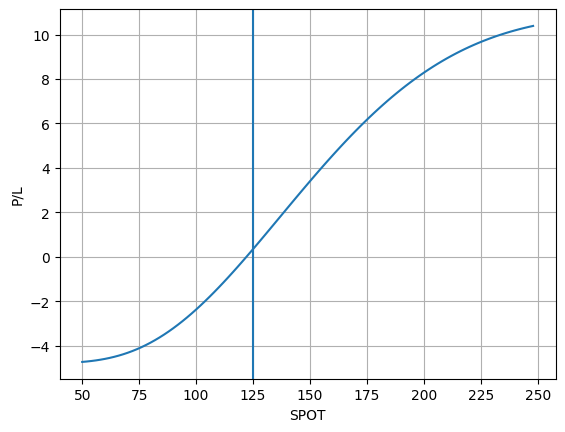

In [30]:
S = [i for i in range(50,250,2)]
T = 0.5
tte = [i/365 for i in range(365,165,-2)]
rfr = 0.0533
sigma = 0.4
K = [[i,i+2] for i in range(125,165,5)]
print("Strikes : ",K)
#call function for each strike and returning net payoff for each spread
def call_spread(atm,tte,S,K,T,sigma,rfr):
    #Buy First Strike(lower) | Sell Second Strike(higher)
    pay = -bsm_premium(atm,K[0],T,rfr,sigma,"Call")
    recv = bsm_premium(atm,K[1],T,rfr,sigma,"Call")
    print("initial : ",pay+recv)
    payoff_1 = [pay+bsm_premium(S[i],K[0],tte[i],rfr,sigma,"Call") for i in range(len(S))]
    payoff_2 = [recv-bsm_premium(S[i],K[1],tte[i],rfr,sigma,"Call") for i in range(len(S))]
    net = [payoff_1[i]+payoff_2[i] for i in range(len(payoff_1))]
    return net
atm = 125
vol = 0.4
res = []
for i in K:
    a = call_spread(atm,tte,S,i,T,sigma,rfr)
    # plt.plot(S,a)
    for j in range(len(a)):
        try:
            res[j]+=a[j]
        except:
            res.append(a[j])
plt.plot(S,res)
plt.xlabel("SPOT")
plt.ylabel("P/L")
plt.axvline(x=atm)
plt.grid(True)

Strikes :  [[125, 127], [130, 132], [135, 137], [140, 142], [145, 147], [150, 152], [155, 157], [160, 162]]
initial :  -0.9152378299992137
initial :  -0.8095423996293292
initial :  -0.7106603831701861
initial :  -0.6195086824255043
initial :  -0.5365784664956266
initial :  -0.4620048906686094
initial :  -0.39564159838655044
initial :  -0.3371326105265382


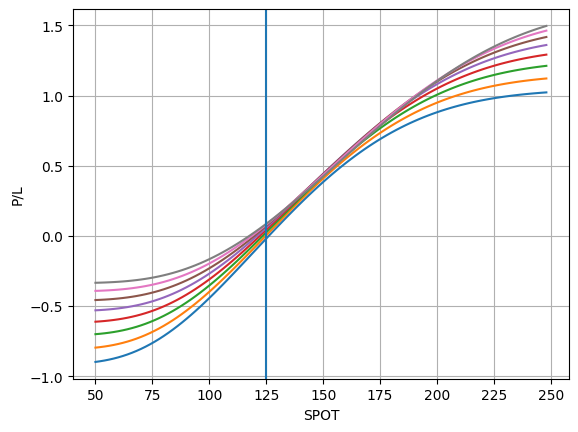

In [31]:
S = [i for i in range(50,250,2)]
T = 0.5
tte = [i/365 for i in range(365,165,-2)]
rfr = 0.0533
sigma = 0.4
K = [[i,i+2] for i in range(125,165,5)]
print("Strikes : ",K)
#call function for each strike and returning net payoff for each spread
def call_spread(atm,tte,S,K,T,sigma,rfr):
    #Buy First Strike(lower) | Sell Second Strike(higher)
    pay = -bsm_premium(atm,K[0],T,rfr,sigma,"Call")
    recv = bsm_premium(atm,K[1],T,rfr,sigma,"Call")
    print("initial : ",pay+recv)
    payoff_1 = [pay+bsm_premium(S[i],K[0],tte[i],rfr,sigma,"Call") for i in range(len(S))]
    payoff_2 = [recv-bsm_premium(S[i],K[1],tte[i],rfr,sigma,"Call") for i in range(len(S))]
    net = [payoff_1[i]+payoff_2[i] for i in range(len(payoff_1))]
    return net
atm = 125
vol = 0.4
res = []
for i in K:
    a = call_spread(atm,tte,S,i,T,sigma,rfr)
    plt.plot(S,a)
    for j in range(len(a)):
        try:
            res[j]+=a[j]
        except:
            res.append(a[j])
# plt.plot(S,res)
plt.xlabel("SPOT")
plt.ylabel("P/L")
plt.axvline(x=atm)
plt.grid(True)

# BULL-CALL SPREAD MOVING SPOT,VOL,TTE

Strikes :  [[125, 127], [130, 132], [135, 137], [140, 142], [145, 147], [150, 152], [155, 157], [160, 162]]
initial :  -0.9152378299992137
initial :  -0.8095423996293292
initial :  -0.7106603831701861
initial :  -0.6195086824255043
initial :  -0.5365784664956266
initial :  -0.4620048906686094
initial :  -0.39564159838655044
initial :  -0.3371326105265382


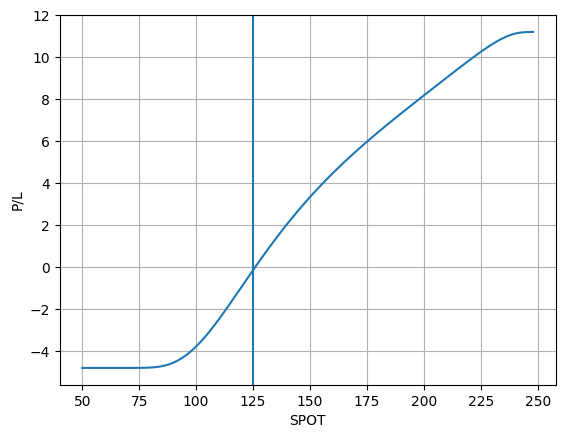

In [48]:
S = [i for i in range(50,250,2)]
T = 0.5
tte = [i/365 for i in range(200,1,-2)]
rfr = 0.0533
sigma = [i/100 for i in range(10,110)]
K = [[i,i+2] for i in range(125,165,5)]
print("Strikes : ",K)
#call function for each strike and returning net payoff for each spread
def call_spread(atm,vol,tte,S,K,T,sigma,rfr):
    #Buy First Strike(lower) | Sell Second Strike(higher)
    pay = -bsm_premium(atm,K[0],T,rfr,vol,"Call")
    recv = bsm_premium(atm,K[1],T,rfr,vol,"Call")
    print("initial : ",pay+recv)
    payoff_1 = [pay+bsm_premium(S[i],K[0],tte[i],rfr,sigma[i],"Call") for i in range(len(S))]
    payoff_2 = [recv-bsm_premium(S[i],K[1],tte[i],rfr,sigma[i],"Call") for i in range(len(S))]
    net = [payoff_1[i]+payoff_2[i] for i in range(len(payoff_1))]
    return net
atm = 125
vol = 0.4
res = []
for i in K:
    a = call_spread(atm,vol,tte,S,i,T,sigma,rfr)
    # plt.plot(S,a)
    for j in range(len(a)):
        try:
            res[j]+=a[j]
        except:
            res.append(a[j])
plt.plot(S,res)
plt.xlabel("SPOT")
plt.ylabel("P/L")
plt.axvline(x=atm)
plt.grid(True)